In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
sns.set(rc={'figure.figsize':(13,10)})

In [7]:
df= pd.read_csv('HR_comma_sep.csv')

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#Checking value of the column named sales
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

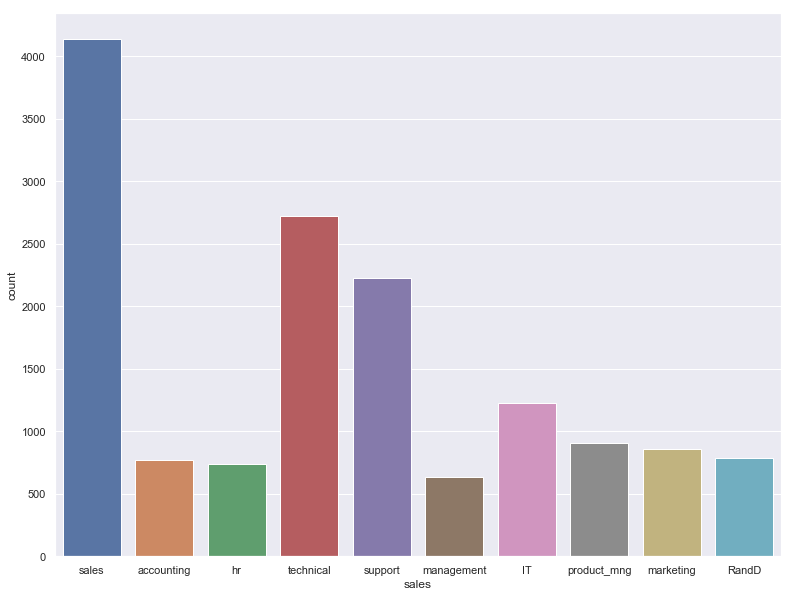

In [11]:
#drawint a countplot
sns.countplot(df['sales'])

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [14]:
#Mapping data, note, you only run data once.
df['left'] = df['left'].map({1:'Yes', 0:'No'})

In [18]:
df.sample(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
7689,0.16,0.78,4,196,5,0,No,0,technical,high
4767,0.87,0.52,3,152,4,0,No,0,technical,low
293,0.11,0.91,6,308,4,1,Yes,0,IT,low
9005,0.57,0.50,5,149,5,1,No,0,RandD,medium


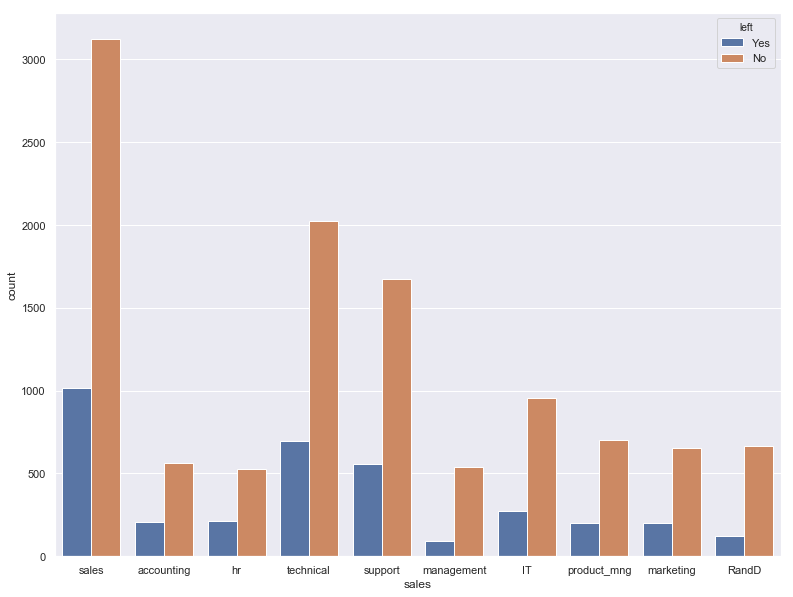

In [17]:
#To know the number of people who left per department sns.countplot(df['sales'])hue= df['left'], data= df
sns.countplot(df['sales'], hue= df['left'])

In [20]:
#to get dummy variables of the data of sales and salary and deletes the previous sales and salary column. so data frames goes from 10 columns to 21 columns Note: run only once
df=pd.get_dummies(df, columns=['sales', 'salary'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null object
promotion_last_5years    14999 non-null int64
sales_IT                 14999 non-null uint8
sales_RandD              14999 non-null uint8
sales_accounting         14999 non-null uint8
sales_hr                 14999 non-null uint8
sales_management         14999 non-null uint8
sales_marketing          14999 non-null uint8
sales_product_mng        14999 non-null uint8
sales_sales              14999 non-null uint8
sales_support            14999 non-null uint8
sales_technical          14999 non-null uint8
salary_high              14999 non-null uint8
salary_low  

In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [24]:
#define x and y columns ; because we are finding out why people are leaving, all other columns are on x, and y gets the left column
x=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium']]
y= df['left']

# Splitting Data

In [25]:
#splitting data for training and testing
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=4)
print ('Train set:' , x_train.shape, y_train.shape)
print ('Test set:' , x_test.shape, y_test.shape)

Train set: (11999, 20) (11999,)
Test set: (3000, 20) (3000,)


# Working with KNN

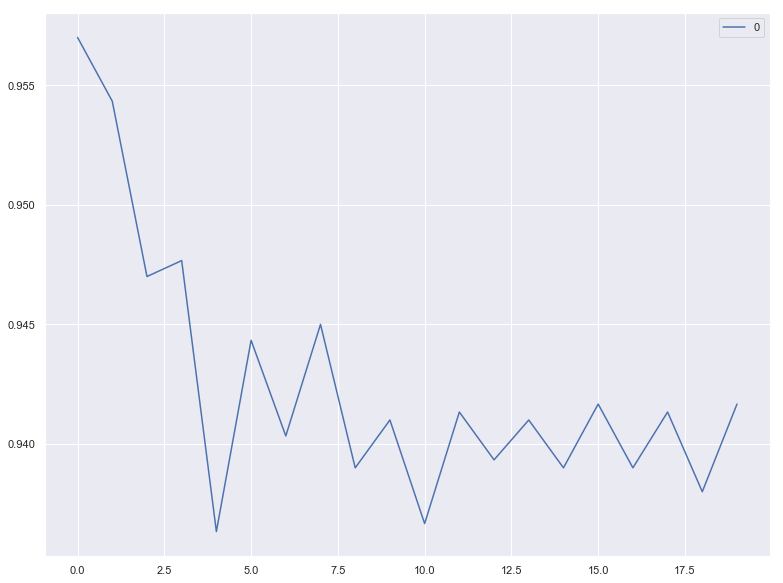

In [44]:
#function to find the best value of K
#accuracy_value (creating an empty list) the line accuracy_value.append(acc)[appends the accuracy value]
#The highest value and not 0 or 1, is the accurate valut, though not the best figure
#this graph helps you choose a good value of K
accuracy_value = []
for k in range(20):
    k=k+1
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    accuracy_value.append(acc)
    
curve = pd.DataFrame(accuracy_value)
curve.plot()

In [38]:
#If you don't specify, it's usually automatically 5
k=2

knn= KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [40]:
#making predictions
yhat= knn.predict(x_test)

In [41]:
#Calculating attributes

accuracy_score(y_test, yhat)*100

95.43333333333334

In [45]:
#the closer the value is to one, the better the model
#support, the actual value of no and yes
#Recall, rate at which model can predict
#precision, how often the model is correct when making a prediction
#F1-score, the mean of recall and precision


print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          No       0.97      0.97      0.97      2287
         Yes       0.91      0.89      0.90       713

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.95      0.95      0.95      3000



# Confusion Matrix

In [47]:
cm=confusion_matrix(y_test, yhat)
print(cm)

[[2226   61]
 [  76  637]]


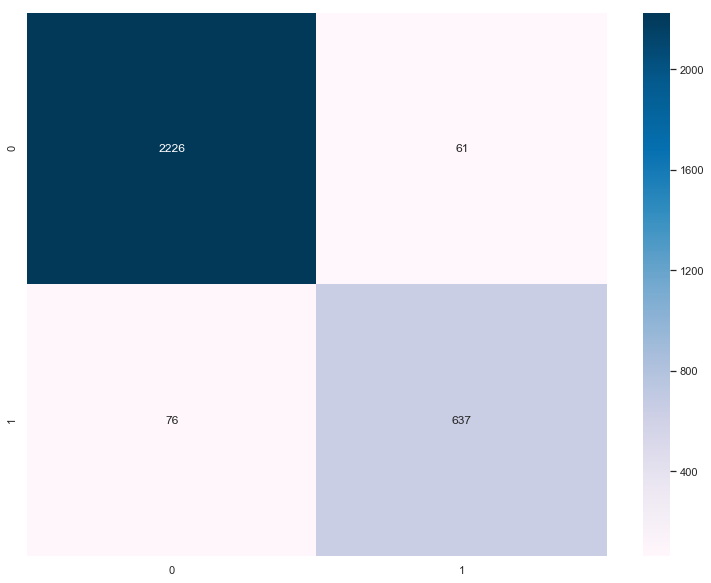

In [55]:
#Drawing the heat map of the confusion matrix
#Note: we are testing to leave , so the null value is leave
#TP- 2226 - were predicted to leave, and left
#FP-61 - Were predicted to leave but they stayed
#TN- 637- were predicted to stay and they stayed
#FN- 76 - Were predicted to stay but they left

sns.heatmap(cm, annot=True, cmap='PuBu', fmt='d')